# Las podas de backtracking segun el orden de los articulos

Vamos a probar para el mejor y peor caso de cada poda la importancia del orden de los articuos

Para esto haremos el siguiente procedimiento:
1. Cremos instancias con ambos ordenamientos para distitnso $n$ entre 15 y 25, $r_i$ y $R$ entre 400 y 500, y los $w_i$ varian para el experimento:
    - $w_i$ entre 50 y 80 se llena muy rápido
    - $w_i$ entre 10 y 30 se llena lento
2. Tomamos muestras de la ejecución de ambas muestras en tres algoritmos propuestos:
    1. Backtracking full, ambas podas.
    2. Fuerza bruta + poda de factibilidad. Sin poda de optimalidad.
    3. Fuerza bruta + poda de optimalidad. Sin poda de factibilidad.
3. Graficamos la comparación del tiempo de ejecución

In [7]:
# Importamos librerias
import numpy as np
import time
import os
import matplotlib.pyplot as plt
from scipy import stats

In [8]:
# Carpeta general
!rm -rf ../instancias/orden
!mkdir ../instancias/orden

In [9]:
# Generador de instancias

default_ns =  np.arange(15, 30)
default_k = 10

def gen(
    _w,
    _path,
    ns = default_ns,
    k = default_k,
    _R = (400, 500),
    _r = (400, 500)
):
    for i in ns:
        for j in range(k):
            R = np.random.randint((_R[1] - _R[0])) + _R[0]
            w = np.random.randint((_w[1] - _w[0]), size = i) + _w[0]
            r = np.random.randint((_r[1] - _r[0]), size = i) + _r[0]

            w, r = zip(*sorted(zip(w, r)))
            f = open((_path + "asc/{}_{}.in").format(i, j), "x")
            f.write("{} {}\n".format(i, R))
            for l in range(i-1):
                f.write("{} {}\n".format(w[l], r[l]))
            f.write("{} {}".format(w[i-1], r[i-1]))
            f.close()
            
            w, r = zip(*sorted(zip(w, r), reverse = True))
            f = open((_path + "desc/{}_{}.in").format(i, j), "x")
            f.write("{} {}\n".format(i, R))
            for l in range(i-1):
                f.write("{} {}\n".format(w[l], r[l]))
            f.write("{} {}".format(w[i-1], r[i-1]))
            f.close()

In [20]:
# Experimento

def experimentar(path, ns = default_ns, _k = default_k):
    timepos_ambas = []
    tiempos_opt = []
    tiempos_fact = []

    for i in ns:
        tiempo_acum_ambas = []
        tiempo_acum_opt = []
        tiempo_acum_fact = []

        for j in range(_k):
            start = time.time()
            os.system(("./../algo3-tp1 ./../" + path + "{}_{}.in 2").format(i, j))
            tiempo_acum_ambas.append(time.time() - start)

            start = time.time()
            os.system("./../algo3-tp1 ./../" + path + "{}_{}.in 5".format(i, j))
            tiempo_acum_opt.append(time.time() - start)

            start = time.time()
            os.system("./../algo3-tp1 ./../" + path + "{}_{}.in 4".format(i, j))
            tiempo_acum_fact.append(time.time() - start )


        timepos_ambas.append(tiempo_acum_ambas)
        tiempos_opt.append(tiempo_acum_opt)
        tiempos_fact.append(tiempo_acum_fact)
    
    return [timepos_ambas, tiempos_opt, tiempos_fact]

In [59]:
def graf_prom(y, i, color, label, ns = default_ns):
    prom_ambas = [np.mean(y[i][j]) for j in range(len(y[0]))]
    plt.plot(ns, prom_ambas, color = color, label = label)
    
def graf_prom_scatter(y, i, color, label, ns = default_ns):
    prom_ambas = [np.mean(y[i][j]) for j in range(len(y[0]))]
    plt.scatter(ns, prom_ambas, color = color, label = label)

def graficar(y, i, color, ns = default_ns, _k = default_k):
    rows = [[] for j in range(_k)]
    
    for j in range(_k):
        for k in range(ns.size):
            rows[j].append(y[i][k][j])
    for j in range(len(rows)):
        plt.scatter(ns + i * 0.02, rows[j], color = color, alpha=0.8, s = 10)

In [22]:
os.system("g++ ../src/main.cpp -o ../algo3-tp1")

0

### Muy pesados

In [23]:
# Generacion de casos
!rm -rf ../instancias/orden/pesados
!mkdir ../instancias/orden/pesados
!mkdir ../instancias/orden/pesados/asc
!mkdir ../instancias/orden/pesados/desc
gen((50, 80), "../instancias/orden/pesados/")

In [24]:
y_pesados_asc = experimentar("instancias/orden/pesados/asc/")

In [25]:
y_pesados_desc = experimentar("instancias/orden/pesados/desc/")

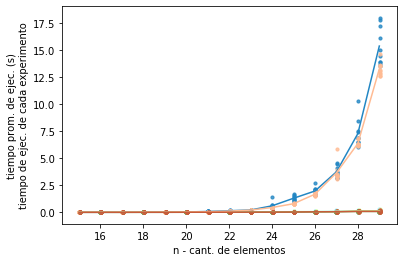

In [27]:
graf_prom(y_pesados_asc, 0, '#9be7ff', 'ambas - asc')
graf_prom(y_pesados_asc, 1, '#2286c3', 'solo opt. - asc')
graf_prom(y_pesados_asc, 2, '#e1ffb1', 'solo fact. - asc')
graf_prom(y_pesados_desc, 0, '#7da453', 'ambas - desc')
graf_prom(y_pesados_desc, 1, '#ffbb93', 'solo opt. - desc')
graf_prom(y_pesados_desc, 2, '#c75b39', 'solo fact. - desc')

graficar(y_pesados_asc, 0, '#9be7ff')
graficar(y_pesados_asc, 1, '#2286c3')
graficar(y_pesados_asc, 2, '#e1ffb1')
graficar(y_pesados_desc, 0, '#7da453')
graficar(y_pesados_desc, 1, '#ffbb93')
graficar(y_pesados_desc, 2, '#c75b39')

plt.xlabel('n - cant. de elementos')
plt.ylabel('tiempo prom. de ejec. (s)\ntiempo de ejec. de cada experimento')

plt.show()

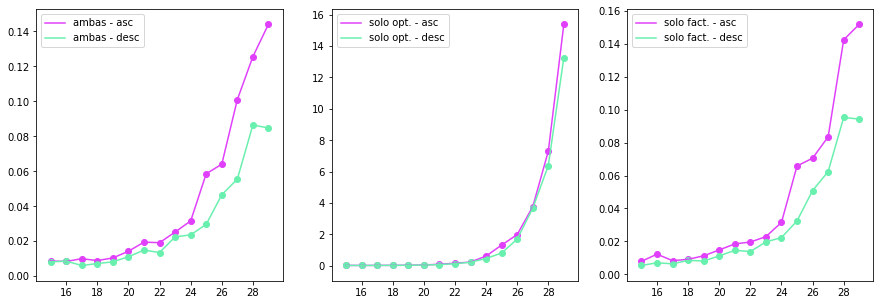

In [61]:
plt.figure(figsize=(15, 5))

plt.subplot(131)

graf_prom(y_pesados_asc, 0, '#e040fb', 'ambas - asc')
graf_prom(y_pesados_desc, 0, '#69f0ae', 'ambas - desc')
plt.legend()
graf_prom_scatter(y_pesados_asc, 0, '#e040fb', 'ambas - asc')
graf_prom_scatter(y_pesados_desc, 0, '#69f0ae', 'ambas - desc')

plt.subplot(132)

graf_prom(y_pesados_asc, 1, '#e040fb', 'solo opt. - asc')
graf_prom(y_pesados_desc, 1, '#69f0ae', 'solo opt. - desc')
plt.legend()
graf_prom_scatter(y_pesados_asc, 1, '#e040fb', 'solo opt. - asc')
graf_prom_scatter(y_pesados_desc, 1, '#69f0ae', 'solo opt. - desc')

plt.subplot(133)

graf_prom(y_pesados_asc, 2, '#e040fb', 'solo fact. - asc')
graf_prom(y_pesados_desc, 2, '#69f0ae', 'solo fact. - desc')
plt.legend()
graf_prom_scatter(y_pesados_asc, 2, '#e040fb', 'solo fact. - asc')
graf_prom_scatter(y_pesados_desc, 2, '#69f0ae', 'solo fact. - desc')

plt.show()

In [62]:
# Generacion de casos
!rm -rf ../instancias/orden/livianos
!mkdir ../instancias/orden/livianos
!mkdir ../instancias/orden/livianos/asc
!mkdir ../instancias/orden/livianos/desc
gen((10, 30), "../instancias/orden/livianos/")

In [63]:
y_livianos_asc = experimentar("instancias/orden/livianos/asc/")

In [64]:
y_livianos_desc = experimentar("instancias/orden/livianos/desc/")

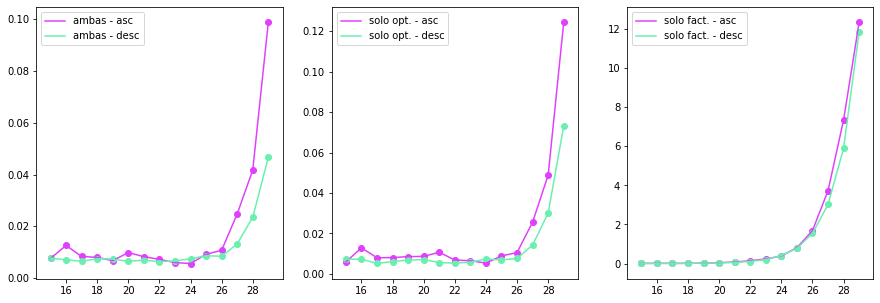

In [65]:
plt.figure(figsize=(15, 5))

plt.subplot(131)

graf_prom(y_livianos_asc, 0, '#e040fb', 'ambas - asc')
graf_prom(y_livianos_desc, 0, '#69f0ae', 'ambas - desc')
plt.legend()
graf_prom_scatter(y_livianos_asc, 0, '#e040fb', 'ambas - asc')
graf_prom_scatter(y_livianos_desc, 0, '#69f0ae', 'ambas - desc')

plt.subplot(132)

graf_prom(y_livianos_asc, 1, '#e040fb', 'solo opt. - asc')
graf_prom(y_livianos_desc, 1, '#69f0ae', 'solo opt. - desc')
plt.legend()
graf_prom_scatter(y_livianos_asc, 1, '#e040fb', 'solo opt. - asc')
graf_prom_scatter(y_livianos_desc, 1, '#69f0ae', 'solo opt. - desc')

plt.subplot(133)

graf_prom(y_livianos_asc, 2, '#e040fb', 'solo fact. - asc')
graf_prom(y_livianos_desc, 2, '#69f0ae', 'solo fact. - desc')
plt.legend()
graf_prom_scatter(y_livianos_asc, 2, '#e040fb', 'solo fact. - asc')
graf_prom_scatter(y_livianos_desc, 2, '#69f0ae', 'solo fact. - desc')

plt.show()

<hr />

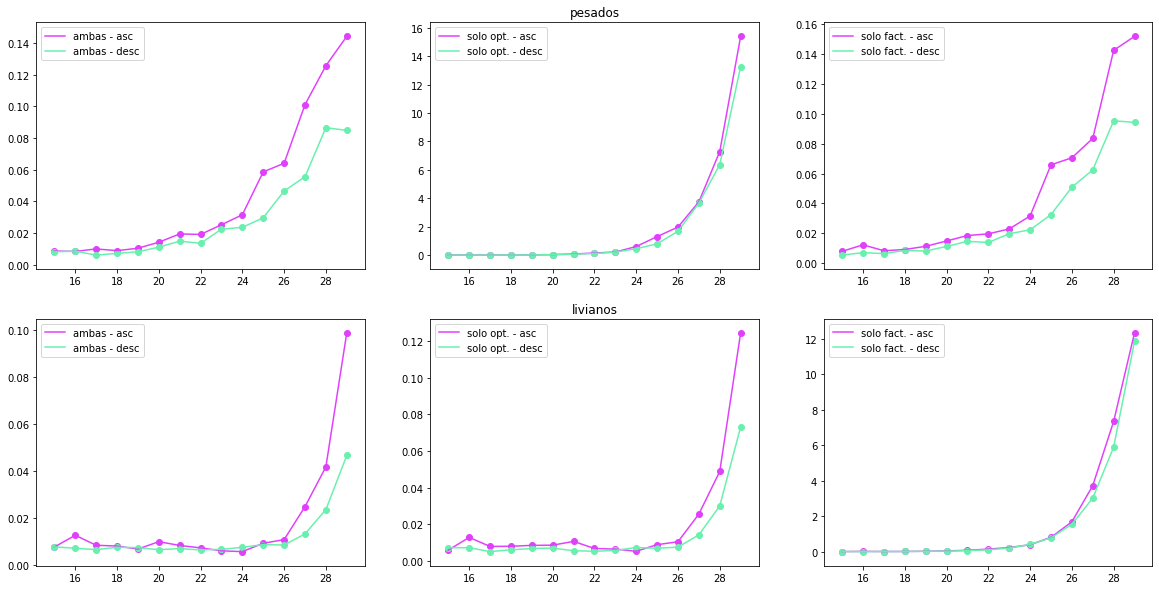

In [94]:
fig,a =  plt.subplots(2,3)
fig.set_size_inches(20, 10)

def graf_prom(y, i, color, label, grafi, grafj, ns = default_ns):
    prom_ambas = [np.mean(y[i][j]) for j in range(len(y[0]))]
    a[grafi][grafj].plot(ns, prom_ambas, color = color, label = label)

def legend(grafi, grafj):
    a[grafi][grafj].legend()

def graf_prom_scatter(y, i, color, label, grafi, grafj, ns = default_ns):
    prom_ambas = [np.mean(y[i][j]) for j in range(len(y[0]))]
    a[grafi][grafj].scatter(ns, prom_ambas, color = color, label = label)

graf_prom(y_pesados_asc, 0, '#e040fb', 'ambas - asc', 0, 0)
graf_prom(y_pesados_desc, 0, '#69f0ae', 'ambas - desc', 0, 0)
legend(0, 0)
graf_prom_scatter(y_pesados_asc, 0, '#e040fb', 'ambas - asc', 0, 0)
graf_prom_scatter(y_pesados_desc, 0, '#69f0ae', 'ambas - desc', 0, 0)

graf_prom(y_pesados_asc, 1, '#e040fb', 'solo opt. - asc', 0, 1)
graf_prom(y_pesados_desc, 1, '#69f0ae', 'solo opt. - desc', 0, 1)
legend(0, 1)
graf_prom_scatter(y_pesados_asc, 1, '#e040fb', 'solo opt. - asc', 0, 1)
graf_prom_scatter(y_pesados_desc, 1, '#69f0ae', 'solo opt. - desc', 0, 1)

a[0][1].set_title('pesados')

graf_prom(y_pesados_asc, 2, '#e040fb', 'solo fact. - asc', 0, 2)
graf_prom(y_pesados_desc, 2, '#69f0ae', 'solo fact. - desc', 0, 2)
legend(0, 2)
graf_prom_scatter(y_pesados_asc, 2, '#e040fb', 'solo fact. - asc', 0, 2)
graf_prom_scatter(y_pesados_desc, 2, '#69f0ae', 'solo fact. - desc', 0, 2)

graf_prom(y_livianos_asc, 0, '#e040fb', 'ambas - asc', 1, 0)
graf_prom(y_livianos_desc, 0, '#69f0ae', 'ambas - desc', 1, 0)
legend(1, 0)
graf_prom_scatter(y_livianos_asc, 0, '#e040fb', 'ambas - asc', 1, 0)
graf_prom_scatter(y_livianos_desc, 0, '#69f0ae', 'ambas - desc', 1, 0)

graf_prom(y_livianos_asc, 1, '#e040fb', 'solo opt. - asc', 1, 1)
graf_prom(y_livianos_desc, 1, '#69f0ae', 'solo opt. - desc', 1, 1)
legend(1, 1)
graf_prom_scatter(y_livianos_asc, 1, '#e040fb', 'solo opt. - asc', 1, 1)
graf_prom_scatter(y_livianos_desc, 1, '#69f0ae', 'solo opt. - desc', 1, 1)

a[1][1].set_title('livianos')

graf_prom(y_livianos_asc, 2, '#e040fb', 'solo fact. - asc', 1, 2)
graf_prom(y_livianos_desc, 2, '#69f0ae', 'solo fact. - desc', 1, 2)
legend(1, 2)
graf_prom_scatter(y_livianos_asc, 2, '#e040fb', 'solo fact. - asc', 1, 2)
graf_prom_scatter(y_livianos_desc, 2, '#69f0ae', 'solo fact. - desc', 1, 2)

plt.show()